In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from collections import Counter

In [9]:
product_json = open('C:/Users/SSAFY/Desktop/21321/AB_finalpjt/back/bank/accounts/fixtures/accounts/depo_info_data326.json', encoding='UTF8')
product_list = json.load(product_json)
json_file_path = 'C:/Users/SSAFY/Desktop/21321/AB_finalpjt/back/bank/accounts/fixtures/accounts/user_data.json'
with open(json_file_path, 'r', encoding='UTF8') as file:
    user_data = json.load(file)


In [10]:

df = pd.DataFrame(product_list)
df_user = pd.DataFrame(user_data_list)
data = df_user[['age','gender','salary','money']]


NameError: name 'user_data_list' is not defined

In [ ]:
genders = []
ages = []
moneys = []
salaries = []
print('assssssssssssssssssssssssssssssssssssssssssss')
for data in user_data:
    genders.append(int(data['gender']))
    ages.append(int(data['age']))
    moneys.append(int(data['money']))
    salaries.append(int(data['salary']))

# 각 항목의 평균 계산
gender_mean = np.mean(genders)
age_mean = np.mean(ages)
money_mean = np.mean(moneys)
salary_mean = np.mean(salaries)

# 평균의 평균 계산
init_centers = np.array([[gender_mean, age_mean, money_mean, salary_mean]] * 4)


In [12]:
genders = []
ages = []
moneys = []
salaries = []
print('assssssssssssssssssssssssssssssssssssssssssss')
for data in user_data:
    genders.append(int(data['gender']))
    ages.append(int(data['age']))
    moneys.append(int(data['money']))
    salaries.append(int(data['salary']))

# 각 항목의 평균 계산
gender_mean = np.mean(genders)
age_mean = np.mean(ages)
money_mean = np.mean(moneys)
salary_mean = np.mean(salaries)

# 평균의 평균 계산
init_centers = np.array([[gender_mean, age_mean, money_mean, salary_mean]] * 4)


assssssssssssssssssssssssssssssssssssssssssss


C:\Users\SSAFY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SSAFY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SSAFY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SSAFY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SSAFY\anaconda3\lib\site-packages\sklearn\clust

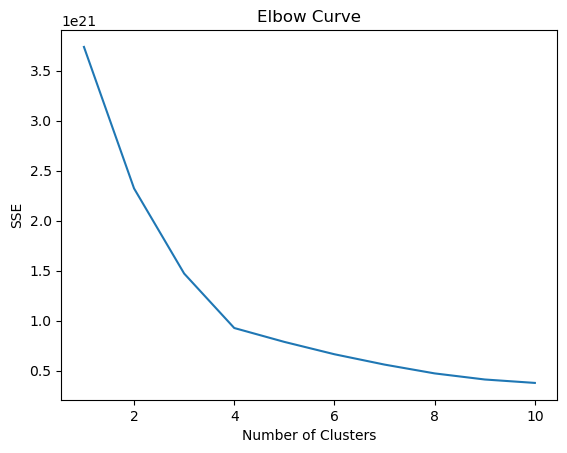

In [14]:

# 엘보우 기법 
df_user = pd.DataFrame(user_data)
data = df_user[['age','gender','salary','money']]

Elbow = []

for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  Elbow.append(kmeans.inertia_)

plt.plot(range(1, 11), Elbow)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.show()
# 보니까 4개

In [16]:
k = 4

kmeans = KMeans(n_clusters=k,init=init_centers,random_state=0,n_init=10)
kmeans.fit(data)


C:\Users\SSAFY\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init=array([[1.502000e+00, 5.007720e+01, 7.537687e+08, 7.471664e+08],
       [1.502000e+00, 5.007720e+01, 7.537687e+08, 7.471664e+08],
       [1.502000e+00, 5.007720e+01, 7.537687e+08, 7.471664e+08],
       [1.502000e+00, 5.007720e+01, 7.537687e+08, 7.471664e+08]]),
       n_clusters=4, n_init=10, random_state=0)

In [17]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [18]:

# 각 인원들이 어느라벨에 속하는지 볼게
df_user['cluster_label'] = labels

# 해당 유저는 가장 마지막에 추가되었으므로 마지막 클러스터 값을 가져온다 !!
user_cluster = df_user['cluster_label'].iloc[-1]

# 유저랑 같은 군집에 있는 애들의 가입된 상품 가져오기
financial_products = df_user.loc[df_user['cluster_label'] == user_cluster, 'financial_products']

# 리스트를 딕셔너리로 변환하여 상품 개수 세기
product_count = dict(Counter(list(financial_products)))

# 정렬 해주고
sorted_products = sorted(product_count.items(), key=lambda x: x[1], reverse=True)

# 가장 많이 가입한 상위 3개 출력 >> 그게 추천 (처음은 가입안한 갯수가나옴 거의 '')
recommend_list = []
for product, count in sorted_products[:4]:
    recommend_list.append((product,count))
    # print(f"Product: {product}, Count: {count}")
# print(product_list)
print(recommend_list)
user_recommend_list_list = []
for i in product_list:
    user_recommend_list = {}
    for j in recommend_list:
        if i['id']==j[0]:
            user_recommend_list['id'] = i['id']
            user_recommend_list['product'] = i['product']
            user_recommend_list_list.append(user_recommend_list)
            break
print(user_recommend_list_list)

[('', 404), ('10140111600061 10141111600051', 13), ('10120114300011', 11), ('01211210122', 10)]
[{'id': '10120114300011', 'product': 'Sh해양플라스틱Zero!예금\n(만기일시지급식)'}, {'id': '01211210122', 'product': 'IBK중기근로자우대적금\n(자유적립식)'}, {'id': '10140111600061 10141111600051', 'product': 'Sh보고싶다!명태야적금Ⅱ(개인)'}]
